In [1]:
for i in range(0,256):
    print(i, end=",")

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

In [2]:
import random
import numpy as np

def appendSBoxes(newSBox, SBoxes):
    for s in SBoxes:
        if np.array_equal(newSBox, s):
            return SBoxes
    SBoxes = np.vstack([SBoxes, newSBox])
    return SBoxes

def getNum(v) :
    n = len(v)
    index = random.randint(0, n - 1)
    num = v[index]
    v[index], v[n - 1] = v[n - 1], v[index]
    v.pop()
    return num

def generateRandom() :
#     result = []
#     v = [0] * n
#     for i in range(n) :
#         v[i] = i + 1
#     while (len(v)) :
# #         print(getNum(v), end = " ")
#         result = np.append(result, (getNum(v)-1))
    return np.random.permutation([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255])

In [3]:
from sage.crypto.sbox import SBox
import numpy as np

    
# S = SBox(a); S
# ddt = S.difference_distribution_table()
# nddt = np.array(ddt)
# print(np.partition(nddt.flatten(), -2)[-2])

SBoxes = np.empty((0,256), int)
a = generateRandom()
SBoxes = np.vstack([SBoxes, a])

while len(SBoxes) < 100:
    newSbox = generateRandom()
    SBoxes = appendSBoxes(newSbox, SBoxes)

du_maxes = []
non_lin = []
combined = []
for s in SBoxes:
    SB = SBox(s)
    d = SB.differential_uniformity()
    n = SB.nonlinearity()
    du_maxes = np.append(du_maxes, d)
    non_lin = np.append(non_lin, n)
    if n == 0:
        combined = np.append(combined, d)
    else:
        combined = np.append(combined, (d / n))
    
print(du_maxes)
print(non_lin)
print(combined)
print(np.average(combined))

[10. 10. 12. 14. 12. 14. 10. 10. 10. 10. 12. 10. 10. 10. 10. 12. 10. 12.
 10. 14. 12. 12. 14. 12. 12. 12. 12. 12. 10. 10. 10. 12. 12. 10. 12. 12.
 10. 10. 10. 10. 12. 10. 10. 10. 10. 12. 12. 12. 10. 12. 12. 12. 10. 10.
 12. 12. 10. 10. 10. 12. 10. 12. 12. 12. 12. 10. 12. 10. 12. 12. 10. 12.
 12. 10. 12. 12. 12. 12. 10. 12. 10. 12. 12. 10. 10. 12. 12. 10. 12. 10.
 12. 12. 10. 12. 10. 12. 10. 14. 12. 10.]
[94. 94. 92. 92. 94. 92. 94. 92. 88. 94. 92. 94. 94. 94. 94. 94. 90. 96.
 92. 92. 94. 96. 94. 92. 92. 94. 92. 88. 94. 94. 94. 94. 92. 94. 94. 94.
 94. 96. 94. 92. 94. 94. 94. 94. 94. 94. 94. 92. 96. 96. 94. 94. 90. 94.
 90. 92. 92. 92. 92. 94. 94. 92. 92. 92. 92. 88. 92. 92. 92. 94. 94. 86.
 94. 92. 92. 92. 92. 94. 92. 92. 92. 94. 92. 92. 92. 94. 92. 92. 92. 92.
 94. 94. 92. 86. 94. 92. 96. 92. 90. 86.]
[0.10638298 0.10638298 0.13043478 0.15217391 0.12765957 0.15217391
 0.10638298 0.10869565 0.11363636 0.10638298 0.13043478 0.10638298
 0.10638298 0.10638298 0.10638298 0.12765957 0.11111

In [4]:
import random



def fitness(permutation):
    SB = SBox(permutation)
    d = SB.differential_uniformity()
    n = SB.nonlinearity()
    mlrb = SB.maximal_linear_bias_relative()
    if n == 0:
        fit = d * mlrb
    else:
        fit = (d / n) * mlrb
    if SB.is_apn():
        fit = 0
    return fit

def rankPop(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i])
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

def selection(popRanked, eliteSize):
    results = []
    for i in range(0, eliteSize):
        results.append(popRanked[i][0])
    for i in range(0, 40):
        results.append(random.choice(popRanked)[0])
    return results


def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    while len(matingpool) < 100 :
        matingpool.append(generateRandom())
    return matingpool
        
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child
    

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children


def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankPop(currentGen)
    a=rankPop(pop)[0]
    print(a)
    print(currentGen[a[0]])
    
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

(0, 0.014128989361702128)
generation
0
(0, 0.014128989361702128)
[ 68 232 152 253   2 172 116 246 235 135 179 138  28  52 148  41 249  82
  65 154 202 142  32 188 245   7 122 203  89 250 147 174 169 166 215 177
 162 204 156   5  75  21 210 171 209 254  43 175 136 192 161 201 105 144
  55 217  23  91  36  14 131  50  51 140 206 248  95  99  35 227 134 170
 184 199 112  20  25 159  59 182 208   6 145 141 163 225 239 130 126  19
 119   9 133 108  49 196 195 219  17 167   4 117  13 241 255 180  96  71
 111 240 190 101  60 132  48  80 197 193  69  42  90 247 149  30  67 146
 242  94 104 153  31 231 155 151  38  44  72 125 233 158  39  61  66  87
 214  18 150  26 129 102  98 213 123 185  11  70 183 110  56   3  53 230
 124  93 220 106 200 115 224 173 103  63 114 143 216 212 221  97 189  83
 137 251   8  64  12 244  79 236  76 157 211  57 165  10  15  40  74  86
  22  84  47 228  77 205 178  45 238 127 207 187  33 120 168 100 194  34
 252  58 139 218 128  73  24 237 223 160 229 243 121 191 16

generation
8
(3, 0.013020833333333334)
[152, 198, 9, 54, 149, 234, 228, 206, 157, 42, 46, 32, 154, 182, 183, 134, 147, 101, 14, 61, 128, 125, 167, 91, 210, 146, 181, 165, 189, 224, 254, 43, 239, 82, 74, 8, 231, 36, 191, 58, 162, 13, 158, 71, 227, 51, 177, 138, 200, 89, 220, 204, 86, 253, 185, 53, 10, 96, 244, 15, 163, 22, 18, 92, 161, 225, 223, 113, 186, 105, 238, 171, 127, 180, 109, 66, 153, 49, 150, 99, 104, 60, 208, 123, 233, 76, 190, 242, 97, 174, 39, 226, 16, 237, 25, 120, 133, 246, 57, 187, 209, 219, 84, 141, 20, 37, 178, 250, 77, 172, 56, 255, 5, 251, 215, 45, 50, 148, 19, 110, 2, 65, 11, 90, 122, 168, 199, 117, 236, 139, 160, 195, 83, 7, 159, 4, 230, 94, 169, 33, 68, 34, 197, 221, 137, 145, 151, 6, 173, 107, 24, 112, 85, 29, 232, 52, 203, 38, 176, 135, 136, 192, 75, 95, 143, 73, 115, 124, 229, 59, 166, 23, 28, 48, 47, 179, 93, 248, 64, 241, 67, 211, 41, 175, 193, 170, 111, 12, 216, 70, 249, 21, 140, 103, 142, 27, 26, 31, 207, 217, 114, 202, 17, 98, 214, 222, 35, 252, 119, 243, 

generation
15
(5, 0.013020833333333334)
[86, 124, 50, 238, 29, 202, 212, 97, 62, 153, 243, 240, 116, 92, 130, 115, 198, 206, 67, 112, 142, 254, 182, 234, 32, 9, 172, 88, 106, 249, 253, 155, 4, 28, 73, 163, 217, 188, 143, 159, 211, 231, 48, 49, 132, 36, 200, 27, 205, 233, 180, 196, 59, 13, 35, 118, 169, 44, 1, 214, 74, 215, 144, 55, 20, 210, 227, 161, 207, 197, 103, 129, 146, 61, 175, 60, 186, 15, 145, 245, 218, 38, 80, 242, 224, 179, 89, 95, 213, 104, 199, 54, 183, 122, 30, 131, 2, 53, 70, 128, 241, 194, 248, 187, 165, 168, 19, 113, 134, 174, 176, 11, 246, 244, 195, 81, 52, 123, 167, 45, 57, 185, 148, 225, 173, 98, 126, 152, 166, 40, 91, 12, 84, 76, 25, 22, 111, 94, 236, 193, 26, 64, 150, 65, 223, 46, 99, 0, 43, 85, 119, 108, 133, 189, 203, 37, 107, 120, 226, 139, 93, 68, 177, 117, 171, 140, 5, 251, 114, 162, 78, 21, 90, 39, 47, 136, 121, 184, 79, 96, 8, 157, 6, 18, 56, 83, 204, 7, 208, 221, 125, 69, 255, 87, 190, 192, 216, 34, 235, 154, 17, 181, 232, 170, 228, 16, 24, 42, 10, 41, 191,

generation
22
(0, 0.013020833333333334)
[124, 180, 179, 197, 165, 202, 190, 157, 223, 184, 192, 240, 50, 178, 168, 195, 142, 188, 225, 34, 115, 203, 183, 55, 227, 130, 29, 28, 93, 239, 112, 23, 16, 129, 216, 242, 94, 92, 156, 21, 229, 186, 191, 95, 167, 140, 6, 231, 236, 232, 214, 215, 47, 198, 85, 122, 204, 238, 7, 141, 136, 27, 12, 123, 243, 161, 128, 81, 51, 110, 59, 98, 82, 84, 75, 37, 134, 42, 249, 87, 88, 211, 121, 25, 103, 255, 131, 62, 13, 228, 105, 241, 118, 26, 159, 253, 174, 114, 113, 153, 9, 187, 100, 80, 74, 72, 181, 246, 244, 137, 48, 125, 222, 135, 226, 132, 77, 70, 145, 248, 254, 111, 250, 8, 63, 36, 65, 251, 86, 14, 15, 252, 61, 144, 201, 69, 212, 138, 199, 143, 45, 56, 148, 67, 91, 152, 158, 154, 221, 11, 194, 104, 127, 53, 233, 149, 224, 219, 106, 133, 22, 208, 90, 10, 120, 116, 40, 146, 20, 60, 150, 182, 171, 41, 99, 5, 170, 230, 220, 207, 234, 3, 196, 2, 46, 172, 57, 39, 206, 19, 35, 210, 17, 18, 209, 213, 189, 162, 73, 108, 64, 79, 71, 33, 193, 31, 38, 151, 96, 16

generation
29
(1, 0.013020833333333334)
[66, 230, 214, 244, 179, 218, 95, 27, 245, 100, 2, 231, 155, 7, 13, 0, 93, 202, 67, 110, 22, 199, 169, 251, 246, 204, 9, 81, 165, 162, 82, 153, 227, 87, 80, 208, 200, 222, 43, 64, 178, 133, 147, 183, 16, 91, 149, 130, 120, 216, 237, 18, 42, 151, 96, 167, 249, 136, 175, 11, 45, 240, 229, 17, 236, 247, 10, 161, 61, 94, 56, 134, 62, 103, 195, 116, 78, 234, 75, 206, 104, 126, 188, 141, 186, 57, 52, 30, 156, 55, 111, 24, 168, 101, 154, 5, 92, 184, 213, 158, 137, 180, 112, 14, 255, 198, 46, 108, 171, 196, 215, 73, 182, 127, 49, 102, 53, 128, 72, 122, 98, 250, 190, 139, 63, 121, 86, 33, 212, 225, 233, 85, 89, 191, 74, 193, 70, 59, 19, 35, 58, 228, 194, 232, 241, 83, 1, 113, 152, 77, 99, 224, 253, 124, 146, 239, 189, 235, 39, 109, 166, 118, 140, 209, 248, 71, 220, 36, 48, 84, 254, 12, 148, 26, 177, 221, 131, 138, 172, 29, 185, 181, 15, 31, 119, 106, 90, 40, 132, 76, 79, 164, 210, 6, 174, 105, 97, 145, 41, 123, 20, 243, 187, 34, 4, 223, 192, 207, 114, 50,

generation
36
(3, 0.013020833333333334)
[204, 119, 182, 169, 190, 153, 31, 94, 78, 88, 111, 100, 68, 175, 189, 55, 4, 196, 48, 90, 34, 33, 154, 82, 73, 216, 45, 224, 248, 177, 116, 15, 247, 233, 148, 12, 57, 229, 145, 102, 158, 63, 195, 95, 198, 9, 112, 64, 52, 246, 99, 176, 49, 240, 251, 227, 151, 101, 40, 6, 21, 192, 254, 243, 180, 22, 143, 71, 234, 212, 126, 134, 167, 241, 236, 208, 13, 150, 230, 122, 203, 174, 137, 27, 17, 1, 118, 146, 43, 156, 62, 69, 93, 162, 250, 42, 98, 67, 23, 211, 191, 159, 135, 77, 54, 200, 249, 14, 239, 115, 114, 51, 96, 50, 228, 37, 104, 44, 109, 20, 207, 66, 120, 18, 202, 28, 19, 81, 217, 188, 123, 168, 193, 237, 8, 194, 46, 164, 29, 225, 58, 252, 36, 181, 86, 2, 56, 201, 226, 30, 245, 3, 205, 173, 242, 238, 149, 179, 107, 210, 85, 185, 110, 127, 74, 131, 163, 187, 223, 170, 35, 161, 47, 5, 139, 218, 129, 41, 39, 222, 59, 165, 214, 83, 124, 92, 166, 184, 97, 152, 255, 199, 84, 26, 25, 172, 142, 136, 75, 16, 11, 219, 79, 138, 80, 128, 106, 91, 144, 10, 121

generation
43
(0, 0.013020833333333334)
[151, 55, 77, 111, 154, 179, 212, 140, 104, 172, 10, 134, 155, 173, 9, 68, 85, 115, 156, 150, 232, 246, 63, 117, 44, 13, 169, 245, 147, 221, 170, 78, 226, 192, 171, 2, 253, 80, 66, 149, 29, 46, 32, 18, 113, 183, 238, 213, 144, 209, 167, 204, 25, 108, 222, 1, 92, 186, 240, 177, 21, 215, 234, 5, 28, 224, 218, 109, 241, 11, 112, 187, 120, 206, 239, 237, 14, 235, 23, 201, 8, 124, 33, 58, 223, 188, 244, 3, 52, 219, 200, 182, 127, 53, 72, 43, 86, 225, 165, 191, 70, 194, 210, 69, 83, 214, 96, 248, 71, 48, 254, 99, 131, 185, 31, 227, 51, 118, 176, 64, 205, 106, 180, 211, 114, 24, 102, 166, 38, 242, 250, 40, 202, 135, 81, 84, 7, 67, 90, 93, 174, 129, 27, 157, 107, 146, 0, 168, 236, 61, 231, 198, 132, 103, 76, 161, 139, 193, 79, 123, 35, 252, 159, 101, 126, 133, 164, 116, 153, 17, 100, 228, 20, 243, 145, 82, 87, 203, 73, 121, 54, 251, 216, 178, 26, 36, 59, 143, 4, 162, 217, 57, 208, 91, 74, 175, 75, 184, 89, 49, 6, 137, 233, 39, 142, 94, 16, 181, 110, 138,

generation
50
(1, 0.013020833333333334)
[152, 30, 164, 198, 154, 13, 2, 4, 91, 134, 252, 182, 231, 7, 165, 68, 121, 254, 166, 139, 255, 26, 31, 84, 211, 86, 195, 217, 105, 76, 122, 120, 185, 219, 9, 56, 40, 81, 39, 203, 138, 102, 137, 236, 90, 212, 62, 47, 94, 118, 63, 1, 161, 204, 111, 130, 196, 18, 103, 135, 162, 3, 163, 172, 113, 179, 199, 221, 72, 155, 69, 140, 188, 46, 123, 37, 24, 167, 107, 11, 55, 156, 230, 223, 34, 59, 38, 176, 169, 142, 206, 125, 16, 183, 153, 71, 178, 12, 77, 115, 220, 19, 78, 246, 6, 14, 108, 235, 28, 88, 146, 48, 70, 5, 174, 112, 238, 100, 201, 132, 227, 194, 177, 228, 148, 15, 157, 104, 21, 114, 189, 53, 141, 226, 29, 45, 248, 237, 175, 184, 8, 87, 197, 202, 98, 74, 239, 96, 27, 44, 99, 75, 85, 224, 209, 64, 222, 240, 58, 181, 245, 244, 218, 250, 180, 17, 207, 232, 210, 66, 242, 35, 229, 89, 50, 119, 23, 190, 83, 127, 129, 249, 92, 143, 0, 20, 126, 186, 247, 22, 25, 253, 171, 159, 216, 251, 33, 61, 243, 208, 54, 205, 97, 51, 241, 41, 234, 124, 160, 214, 32

generation
57
(1, 0.013020833333333334)
[112, 120, 155, 143, 160, 122, 240, 248, 141, 62, 46, 152, 14, 239, 217, 30, 63, 165, 21, 89, 104, 100, 118, 32, 154, 203, 23, 195, 169, 33, 215, 185, 108, 84, 41, 138, 78, 18, 45, 246, 35, 231, 12, 107, 83, 139, 179, 10, 244, 27, 224, 94, 242, 6, 197, 229, 119, 134, 98, 193, 209, 210, 129, 114, 52, 228, 220, 34, 204, 101, 2, 59, 99, 202, 151, 183, 123, 82, 234, 188, 200, 124, 146, 164, 199, 180, 85, 219, 53, 76, 145, 147, 125, 39, 67, 57, 61, 95, 9, 159, 117, 237, 157, 7, 113, 184, 54, 43, 235, 243, 189, 137, 79, 255, 116, 187, 74, 177, 69, 5, 93, 31, 37, 97, 173, 162, 218, 250, 131, 3, 128, 91, 198, 201, 87, 216, 50, 212, 253, 25, 226, 208, 252, 58, 241, 48, 182, 194, 109, 17, 102, 60, 245, 0, 211, 103, 249, 49, 135, 38, 207, 40, 16, 15, 163, 110, 90, 227, 56, 64, 181, 81, 149, 96, 133, 127, 192, 156, 225, 233, 65, 167, 205, 92, 222, 66, 88, 153, 121, 221, 171, 238, 29, 75, 236, 166, 186, 86, 136, 4, 42, 213, 214, 161, 206, 28, 47, 140, 105, 14

generation
64
(0, 0.013020833333333334)
[2, 235, 239, 69, 234, 72, 149, 177, 251, 23, 136, 59, 99, 25, 29, 152, 101, 215, 110, 204, 67, 232, 238, 63, 79, 153, 66, 137, 113, 28, 73, 120, 42, 127, 104, 219, 144, 0, 47, 51, 87, 169, 236, 186, 157, 198, 58, 226, 158, 81, 33, 216, 74, 167, 147, 178, 92, 255, 249, 201, 203, 1, 227, 162, 164, 161, 13, 231, 119, 155, 85, 214, 9, 121, 188, 228, 180, 98, 54, 134, 30, 125, 71, 31, 37, 202, 173, 181, 247, 106, 154, 18, 213, 170, 117, 150, 171, 151, 11, 65, 179, 109, 89, 46, 230, 56, 131, 209, 195, 139, 163, 36, 208, 185, 229, 16, 193, 80, 138, 115, 244, 7, 20, 19, 192, 34, 196, 146, 165, 48, 135, 39, 128, 206, 197, 21, 27, 52, 253, 4, 156, 24, 105, 17, 243, 132, 10, 78, 94, 221, 14, 102, 70, 159, 220, 111, 148, 95, 88, 50, 45, 212, 222, 210, 245, 252, 241, 100, 166, 143, 130, 218, 107, 22, 93, 64, 187, 145, 57, 6, 142, 237, 194, 77, 183, 90, 217, 116, 199, 38, 44, 3, 53, 182, 12, 43, 175, 108, 233, 123, 133, 40, 184, 246, 91, 242, 160, 62, 225, 24

generation
71
(5, 0.013020833333333334)
[165, 150, 237, 7, 13, 57, 80, 194, 234, 69, 74, 10, 138, 9, 75, 153, 115, 161, 65, 64, 193, 94, 187, 160, 155, 81, 0, 154, 49, 169, 175, 177, 207, 144, 254, 167, 197, 143, 45, 158, 139, 205, 25, 67, 54, 87, 97, 225, 34, 221, 223, 137, 132, 76, 199, 244, 211, 249, 53, 178, 147, 130, 89, 126, 72, 224, 123, 226, 245, 95, 216, 218, 134, 15, 33, 195, 204, 63, 73, 157, 127, 38, 251, 68, 47, 88, 189, 19, 255, 86, 222, 40, 83, 99, 32, 231, 142, 82, 78, 113, 114, 125, 233, 93, 14, 104, 22, 119, 84, 120, 103, 77, 201, 151, 43, 170, 174, 2, 1, 18, 58, 17, 61, 163, 85, 129, 149, 235, 59, 200, 135, 145, 50, 217, 102, 21, 121, 191, 26, 31, 140, 206, 176, 90, 252, 3, 243, 185, 236, 239, 8, 219, 42, 172, 248, 232, 128, 62, 179, 37, 220, 210, 24, 250, 112, 5, 52, 55, 39, 20, 44, 230, 51, 148, 116, 159, 208, 203, 188, 92, 41, 28, 96, 29, 228, 166, 133, 131, 98, 11, 229, 215, 12, 118, 246, 105, 136, 107, 111, 122, 164, 146, 182, 183, 16, 227, 168, 27, 100, 79, 152

generation
78
(0, 0.013020833333333334)
[73, 106, 202, 214, 0, 27, 225, 53, 88, 66, 85, 6, 188, 46, 216, 40, 28, 8, 30, 250, 244, 44, 120, 236, 20, 183, 148, 77, 12, 49, 67, 108, 69, 76, 164, 170, 133, 136, 107, 134, 152, 241, 98, 191, 87, 197, 222, 226, 180, 80, 18, 118, 243, 61, 1, 122, 43, 117, 143, 36, 70, 200, 24, 242, 166, 93, 186, 75, 129, 112, 37, 102, 219, 154, 89, 248, 16, 97, 254, 48, 207, 193, 194, 237, 101, 71, 137, 95, 209, 220, 116, 142, 65, 168, 246, 229, 189, 91, 247, 161, 119, 42, 104, 228, 140, 199, 208, 26, 41, 110, 201, 185, 205, 251, 29, 177, 165, 79, 245, 169, 7, 179, 125, 34, 63, 38, 173, 157, 132, 198, 196, 231, 150, 252, 239, 105, 115, 50, 235, 81, 127, 86, 58, 153, 147, 187, 39, 171, 249, 121, 78, 174, 156, 17, 52, 123, 253, 33, 31, 83, 151, 211, 238, 84, 160, 2, 218, 56, 227, 172, 141, 96, 9, 92, 138, 159, 35, 204, 109, 192, 103, 90, 210, 113, 3, 45, 130, 111, 19, 139, 22, 181, 234, 203, 175, 82, 217, 54, 230, 167, 94, 144, 10, 124, 4, 126, 13, 221, 99, 47, 

generation
85
(4, 0.013020833333333334)
[156, 223, 252, 203, 201, 6, 218, 215, 16, 5, 207, 247, 39, 216, 230, 130, 90, 164, 237, 107, 226, 97, 128, 61, 34, 184, 211, 124, 137, 142, 157, 188, 165, 197, 66, 232, 113, 214, 77, 60, 171, 187, 168, 219, 139, 146, 220, 65, 245, 75, 205, 154, 172, 0, 44, 242, 119, 180, 111, 117, 81, 246, 86, 131, 163, 227, 229, 152, 135, 57, 161, 30, 100, 58, 179, 251, 217, 151, 105, 170, 62, 63, 206, 87, 136, 239, 193, 50, 53, 254, 192, 213, 185, 85, 175, 21, 36, 76, 29, 199, 235, 47, 194, 233, 35, 4, 83, 28, 241, 236, 23, 234, 84, 231, 140, 73, 148, 177, 3, 37, 92, 167, 99, 13, 149, 55, 52, 255, 103, 145, 88, 244, 196, 133, 49, 250, 109, 24, 249, 68, 208, 104, 115, 10, 27, 228, 22, 174, 72, 176, 166, 67, 17, 238, 210, 162, 127, 224, 123, 94, 19, 191, 15, 11, 120, 38, 186, 122, 181, 221, 41, 70, 125, 138, 56, 78, 110, 195, 147, 248, 42, 222, 80, 209, 106, 160, 45, 141, 150, 182, 26, 12, 7, 169, 116, 14, 178, 82, 132, 212, 153, 129, 31, 46, 79, 112, 126, 43, 9

generation
92
(7, 0.013020833333333334)
[168, 249, 53, 191, 190, 172, 242, 44, 183, 233, 57, 138, 102, 207, 32, 129, 147, 166, 4, 196, 130, 141, 95, 15, 100, 237, 244, 81, 64, 228, 197, 177, 108, 163, 123, 180, 174, 195, 26, 107, 251, 250, 54, 47, 234, 115, 158, 118, 171, 176, 187, 89, 137, 201, 90, 181, 238, 58, 221, 63, 0, 179, 19, 202, 213, 76, 11, 157, 146, 252, 1, 92, 170, 69, 87, 34, 189, 219, 114, 52, 45, 56, 6, 120, 72, 42, 173, 2, 145, 18, 182, 241, 194, 218, 165, 121, 125, 139, 3, 151, 103, 122, 149, 203, 40, 20, 41, 75, 55, 200, 226, 65, 248, 106, 24, 254, 35, 51, 253, 10, 5, 33, 93, 22, 208, 236, 184, 113, 14, 225, 73, 110, 230, 209, 62, 126, 127, 117, 68, 152, 86, 94, 7, 193, 36, 240, 96, 49, 27, 37, 169, 142, 104, 131, 204, 77, 175, 227, 134, 223, 105, 78, 153, 140, 99, 43, 198, 231, 162, 243, 133, 124, 29, 159, 8, 211, 150, 85, 214, 109, 66, 28, 216, 61, 144, 50, 206, 188, 224, 119, 205, 38, 16, 25, 82, 13, 39, 116, 48, 155, 23, 156, 132, 215, 59, 67, 80, 97, 84, 222, 17

generation
99
(26, 0.011957908163265307)
[1, 21, 201, 139, 194, 31, 111, 224, 87, 118, 233, 193, 116, 170, 6, 32, 217, 237, 159, 222, 138, 0, 157, 252, 48, 249, 80, 74, 140, 35, 130, 25, 133, 5, 227, 187, 47, 76, 95, 92, 96, 231, 188, 104, 255, 218, 146, 34, 38, 78, 41, 144, 172, 213, 208, 113, 26, 128, 142, 141, 186, 154, 238, 53, 126, 151, 229, 33, 68, 112, 15, 120, 248, 42, 24, 84, 90, 101, 164, 56, 136, 59, 198, 254, 114, 89, 119, 131, 153, 246, 102, 166, 158, 43, 134, 161, 39, 226, 178, 108, 27, 190, 243, 19, 11, 191, 160, 214, 225, 8, 86, 36, 28, 196, 245, 148, 173, 147, 223, 239, 212, 77, 253, 22, 17, 124, 200, 18, 63, 206, 51, 23, 247, 209, 12, 67, 30, 137, 241, 177, 75, 251, 244, 185, 135, 40, 149, 49, 99, 234, 37, 163, 220, 13, 250, 46, 3, 236, 176, 216, 57, 205, 61, 29, 184, 192, 242, 71, 180, 215, 54, 69, 107, 189, 210, 14, 169, 93, 20, 129, 62, 2, 127, 44, 16, 125, 168, 181, 85, 145, 132, 228, 174, 162, 202, 50, 235, 4, 165, 123, 167, 204, 70, 88, 45, 232, 52, 155, 152, 22

generation
106
(0, 0.013020833333333334)
[255, 129, 118, 83, 249, 127, 172, 79, 155, 68, 113, 149, 120, 234, 196, 159, 163, 50, 199, 164, 162, 88, 235, 5, 91, 184, 135, 205, 33, 137, 130, 73, 39, 20, 208, 45, 109, 189, 27, 61, 103, 206, 224, 247, 112, 13, 169, 107, 124, 2, 29, 76, 185, 153, 219, 75, 122, 90, 87, 156, 238, 40, 176, 78, 17, 99, 132, 147, 241, 201, 243, 245, 84, 237, 35, 123, 182, 202, 55, 173, 236, 71, 158, 134, 66, 254, 213, 117, 54, 111, 126, 190, 250, 142, 106, 23, 211, 114, 21, 12, 253, 63, 36, 42, 138, 15, 223, 96, 57, 85, 168, 214, 19, 52, 175, 151, 43, 101, 44, 204, 221, 74, 11, 53, 192, 191, 246, 7, 82, 32, 89, 80, 210, 165, 133, 69, 240, 232, 144, 1, 115, 229, 28, 200, 179, 65, 166, 167, 92, 60, 209, 121, 141, 180, 56, 145, 16, 148, 161, 197, 231, 41, 128, 22, 178, 37, 222, 48, 93, 207, 49, 203, 62, 248, 51, 25, 94, 81, 70, 102, 251, 228, 104, 64, 215, 217, 98, 171, 31, 26, 24, 212, 46, 34, 58, 152, 0, 9, 154, 100, 186, 150, 30, 226, 108, 3, 116, 38, 72, 216, 17

generation
113
(2, 0.013020833333333334)
[125, 38, 163, 143, 6, 35, 104, 252, 120, 21, 46, 129, 179, 224, 103, 22, 61, 136, 156, 228, 213, 113, 75, 7, 248, 128, 174, 62, 126, 181, 39, 141, 36, 226, 191, 161, 137, 254, 190, 102, 105, 221, 210, 5, 3, 30, 121, 189, 65, 201, 177, 48, 85, 63, 133, 119, 87, 13, 78, 18, 55, 192, 246, 216, 153, 58, 1, 167, 117, 250, 97, 155, 9, 124, 23, 205, 182, 139, 108, 172, 146, 175, 170, 110, 64, 198, 151, 211, 116, 202, 214, 66, 147, 206, 207, 138, 101, 99, 34, 57, 238, 142, 40, 152, 166, 107, 76, 43, 44, 251, 203, 106, 188, 134, 4, 154, 233, 178, 86, 194, 135, 28, 79, 249, 67, 59, 80, 208, 244, 109, 187, 42, 20, 16, 90, 122, 27, 71, 84, 243, 12, 53, 11, 33, 123, 130, 31, 74, 237, 150, 69, 19, 0, 24, 32, 52, 77, 235, 92, 209, 227, 212, 186, 217, 200, 132, 145, 15, 25, 73, 236, 100, 149, 83, 234, 10, 168, 115, 47, 50, 49, 37, 162, 45, 68, 56, 245, 70, 112, 91, 193, 127, 96, 225, 2, 231, 176, 158, 26, 215, 54, 165, 60, 93, 239, 220, 197, 196, 219, 240, 118

generation
120
(1, 0.013020833333333334)
[118, 192, 31, 63, 74, 40, 214, 128, 41, 18, 54, 56, 70, 216, 153, 58, 254, 51, 99, 124, 243, 229, 226, 60, 110, 219, 251, 224, 125, 248, 62, 215, 21, 234, 176, 11, 162, 48, 175, 119, 173, 136, 46, 132, 30, 174, 188, 49, 190, 187, 252, 79, 78, 195, 102, 201, 81, 122, 44, 2, 240, 33, 137, 177, 178, 19, 163, 3, 169, 165, 72, 94, 206, 156, 43, 104, 239, 211, 92, 27, 204, 98, 220, 112, 131, 1, 144, 101, 126, 208, 189, 236, 83, 89, 85, 24, 223, 253, 93, 245, 109, 159, 0, 91, 114, 149, 222, 129, 250, 182, 143, 228, 168, 67, 38, 22, 184, 207, 117, 76, 127, 57, 29, 96, 200, 210, 202, 86, 105, 196, 15, 218, 52, 55, 242, 155, 179, 170, 80, 193, 171, 233, 134, 88, 150, 59, 186, 255, 37, 16, 203, 26, 180, 138, 147, 5, 238, 121, 145, 82, 167, 90, 212, 148, 71, 246, 7, 225, 141, 130, 249, 232, 36, 111, 198, 157, 161, 191, 32, 6, 133, 17, 152, 10, 158, 237, 9, 227, 181, 205, 166, 116, 108, 107, 209, 199, 194, 113, 4, 217, 28, 185, 8, 241, 73, 244, 230, 160, 23

generation
127
(4, 0.013020833333333334)
[118, 192, 39, 63, 53, 40, 214, 128, 184, 18, 54, 56, 102, 216, 153, 58, 254, 67, 99, 124, 243, 229, 226, 60, 110, 219, 251, 224, 125, 248, 134, 158, 183, 234, 146, 11, 100, 2, 175, 232, 26, 136, 46, 132, 30, 13, 188, 49, 190, 187, 252, 79, 78, 195, 139, 201, 81, 122, 68, 48, 24, 33, 137, 177, 178, 9, 163, 3, 169, 165, 96, 94, 144, 204, 64, 104, 72, 211, 92, 27, 156, 98, 220, 112, 131, 1, 206, 101, 126, 157, 222, 236, 83, 89, 85, 240, 223, 253, 202, 245, 62, 159, 0, 107, 114, 149, 235, 129, 250, 182, 143, 228, 168, 51, 38, 22, 109, 207, 117, 76, 127, 135, 29, 91, 10, 210, 93, 241, 105, 196, 15, 218, 52, 150, 242, 155, 197, 170, 123, 193, 171, 233, 41, 42, 95, 59, 186, 255, 37, 16, 203, 173, 180, 138, 147, 5, 174, 121, 145, 82, 167, 90, 212, 148, 71, 130, 7, 225, 141, 246, 249, 119, 36, 111, 198, 208, 179, 191, 32, 6, 133, 57, 152, 200, 215, 31, 19, 227, 181, 205, 166, 116, 108, 217, 209, 199, 194, 113, 86, 239, 28, 185, 8, 4, 73, 61, 231, 160, 1

generation
134
(0, 0.013020833333333334)
[41, 161, 253, 33, 213, 49, 81, 186, 46, 44, 2, 148, 115, 223, 126, 16, 202, 238, 248, 51, 9, 183, 203, 29, 27, 171, 179, 99, 198, 194, 123, 87, 222, 252, 201, 239, 98, 226, 25, 74, 170, 146, 141, 32, 43, 227, 142, 199, 164, 79, 72, 244, 117, 246, 175, 254, 154, 174, 160, 90, 204, 140, 18, 212, 233, 159, 145, 191, 23, 232, 228, 192, 156, 195, 236, 101, 128, 190, 110, 75, 173, 68, 178, 39, 163, 20, 83, 187, 131, 103, 67, 58, 19, 219, 241, 150, 102, 35, 71, 14, 92, 13, 181, 216, 70, 62, 0, 36, 251, 59, 139, 34, 12, 82, 205, 109, 1, 56, 133, 47, 137, 64, 15, 37, 189, 235, 200, 91, 45, 63, 3, 48, 220, 89, 105, 168, 111, 106, 50, 169, 208, 6, 80, 31, 196, 8, 77, 250, 65, 182, 147, 132, 157, 42, 130, 28, 234, 193, 247, 120, 206, 97, 127, 243, 93, 26, 57, 221, 122, 215, 135, 149, 152, 17, 214, 86, 54, 231, 224, 158, 151, 125, 249, 184, 185, 162, 176, 100, 229, 7, 24, 95, 22, 66, 188, 217, 166, 167, 144, 153, 94, 172, 5, 245, 129, 136, 197, 76, 143, 134

generation
141
(0, 0.011957908163265307)
[215, 244, 22, 77, 205, 195, 125, 46, 207, 0, 253, 177, 60, 189, 50, 228, 157, 252, 7, 134, 31, 29, 162, 147, 23, 132, 193, 226, 120, 183, 249, 238, 115, 136, 79, 72, 246, 175, 254, 154, 80, 160, 90, 204, 140, 18, 58, 82, 186, 95, 128, 40, 181, 231, 216, 52, 224, 114, 92, 30, 151, 173, 185, 211, 145, 209, 247, 70, 76, 235, 217, 166, 121, 221, 187, 47, 73, 138, 16, 251, 131, 137, 54, 68, 143, 84, 2, 255, 78, 232, 106, 89, 55, 57, 241, 214, 118, 196, 192, 108, 36, 168, 130, 180, 65, 5, 110, 87, 105, 53, 153, 172, 124, 169, 81, 167, 243, 233, 237, 20, 4, 49, 158, 64, 48, 83, 107, 56, 176, 230, 156, 13, 45, 103, 44, 8, 93, 122, 37, 178, 236, 32, 229, 240, 94, 17, 34, 38, 159, 109, 179, 28, 51, 119, 208, 61, 26, 245, 239, 152, 63, 164, 188, 71, 200, 146, 198, 161, 85, 111, 43, 144, 116, 250, 174, 201, 139, 99, 149, 206, 15, 101, 100, 184, 242, 113, 197, 194, 227, 42, 199, 62, 39, 96, 59, 35, 223, 27, 102, 97, 133, 9, 74, 67, 191, 210, 11, 25, 98, 141

generation
148
(1, 0.013020833333333334)
[220, 55, 49, 189, 234, 233, 237, 197, 0, 99, 182, 76, 250, 13, 179, 223, 208, 12, 141, 167, 84, 148, 144, 187, 142, 241, 88, 100, 205, 78, 60, 193, 229, 45, 219, 131, 69, 77, 27, 214, 165, 132, 46, 253, 66, 226, 91, 244, 204, 23, 97, 242, 20, 143, 22, 18, 1, 118, 32, 228, 213, 39, 9, 240, 28, 93, 251, 14, 248, 201, 112, 96, 113, 203, 116, 82, 95, 30, 127, 217, 43, 41, 222, 192, 231, 81, 44, 65, 102, 79, 110, 52, 151, 105, 50, 75, 191, 178, 247, 63, 117, 202, 252, 67, 181, 94, 134, 70, 57, 16, 119, 212, 89, 209, 64, 243, 211, 171, 137, 114, 138, 136, 210, 236, 147, 34, 196, 180, 230, 25, 15, 161, 152, 8, 170, 249, 51, 31, 90, 255, 35, 53, 36, 72, 157, 26, 154, 68, 54, 87, 98, 195, 155, 174, 11, 106, 159, 218, 227, 5, 194, 150, 126, 2, 124, 177, 184, 123, 239, 162, 185, 130, 6, 175, 59, 128, 24, 149, 135, 129, 172, 224, 225, 153, 107, 146, 156, 19, 168, 121, 103, 83, 58, 56, 207, 215, 198, 120, 42, 74, 169, 158, 37, 133, 163, 145, 254, 232, 176, 

generation
155
(3, 0.013020833333333334)
[164, 245, 227, 6, 79, 242, 170, 0, 206, 191, 175, 193, 33, 58, 252, 143, 160, 202, 12, 208, 47, 117, 26, 127, 98, 5, 171, 3, 237, 226, 246, 236, 156, 218, 162, 192, 228, 119, 186, 105, 234, 145, 204, 180, 63, 179, 155, 199, 74, 106, 70, 87, 19, 40, 141, 50, 138, 102, 24, 197, 95, 130, 84, 213, 146, 231, 89, 45, 75, 195, 215, 221, 55, 91, 222, 255, 168, 183, 217, 201, 17, 15, 82, 99, 43, 94, 108, 157, 189, 114, 22, 212, 54, 144, 2, 253, 85, 136, 4, 21, 198, 83, 48, 254, 20, 35, 78, 196, 251, 230, 69, 219, 116, 128, 139, 90, 135, 210, 32, 133, 88, 250, 132, 225, 205, 76, 41, 194, 169, 224, 223, 49, 109, 60, 25, 238, 62, 200, 142, 147, 149, 121, 64, 14, 131, 239, 140, 30, 125, 36, 158, 77, 207, 165, 235, 161, 187, 153, 80, 68, 203, 233, 118, 86, 81, 126, 163, 67, 167, 28, 181, 185, 100, 129, 229, 152, 216, 38, 124, 209, 59, 177, 148, 1, 96, 122, 56, 241, 46, 107, 73, 23, 42, 44, 9, 243, 248, 211, 7, 71, 188, 120, 113, 37, 111, 101, 137, 182, 244, 

generation
162
(2, 0.013020833333333334)
[165, 120, 200, 36, 63, 241, 122, 75, 225, 197, 71, 226, 96, 158, 118, 174, 222, 238, 194, 99, 81, 97, 5, 253, 137, 149, 255, 208, 132, 139, 16, 196, 115, 216, 166, 116, 148, 210, 160, 79, 4, 171, 207, 29, 204, 65, 141, 185, 22, 84, 198, 11, 138, 76, 50, 26, 133, 49, 247, 130, 117, 203, 192, 156, 98, 121, 88, 248, 129, 135, 243, 182, 34, 113, 105, 60, 170, 144, 10, 102, 33, 21, 231, 233, 251, 109, 143, 67, 31, 164, 163, 74, 236, 206, 42, 89, 186, 108, 232, 142, 179, 230, 69, 111, 28, 23, 244, 39, 223, 175, 221, 41, 155, 83, 180, 27, 3, 151, 199, 169, 227, 242, 188, 25, 193, 24, 20, 86, 220, 161, 38, 153, 18, 125, 191, 30, 73, 80, 187, 134, 145, 8, 14, 2, 104, 70, 176, 101, 150, 48, 136, 154, 147, 219, 72, 6, 93, 62, 214, 114, 40, 124, 82, 181, 47, 61, 56, 213, 189, 32, 211, 178, 94, 119, 128, 103, 237, 43, 15, 252, 146, 240, 127, 52, 0, 44, 195, 254, 177, 172, 106, 45, 212, 183, 53, 37, 205, 224, 7, 100, 173, 57, 17, 51, 77, 152, 126, 215, 66, 3

generation
169
(0, 0.011957908163265307)
[27, 87, 84, 9, 126, 16, 177, 86, 123, 81, 93, 218, 140, 203, 219, 64, 117, 90, 78, 211, 125, 105, 213, 52, 190, 6, 115, 175, 44, 135, 100, 181, 109, 216, 185, 154, 249, 110, 145, 156, 157, 159, 246, 182, 189, 180, 71, 199, 170, 42, 165, 248, 196, 138, 8, 53, 43, 63, 70, 210, 193, 229, 89, 215, 23, 99, 60, 139, 4, 217, 168, 192, 31, 0, 26, 25, 237, 3, 234, 122, 77, 151, 121, 225, 205, 241, 83, 226, 240, 167, 146, 20, 35, 98, 119, 111, 72, 136, 95, 96, 68, 166, 172, 91, 171, 176, 49, 232, 50, 148, 147, 149, 224, 250, 153, 34, 107, 75, 137, 150, 36, 40, 46, 209, 178, 255, 134, 94, 59, 239, 104, 127, 113, 254, 57, 37, 143, 128, 144, 253, 214, 67, 79, 102, 173, 1, 7, 133, 18, 201, 116, 141, 231, 28, 200, 88, 10, 233, 142, 158, 5, 69, 65, 161, 252, 238, 162, 56, 120, 108, 169, 155, 17, 222, 33, 13, 245, 197, 15, 45, 174, 227, 29, 247, 24, 221, 97, 38, 198, 129, 58, 103, 62, 41, 194, 106, 251, 243, 19, 206, 228, 179, 202, 242, 85, 235, 92, 223, 66, 80

generation
176
(6, 0.013020833333333334)
[109, 58, 67, 112, 89, 80, 4, 180, 252, 149, 174, 116, 234, 56, 49, 248, 74, 158, 32, 205, 50, 36, 5, 161, 246, 83, 35, 187, 213, 11, 204, 225, 95, 44, 146, 222, 148, 239, 90, 71, 63, 99, 173, 243, 221, 88, 176, 157, 31, 131, 216, 86, 200, 206, 23, 210, 87, 147, 41, 219, 201, 6, 207, 119, 191, 190, 244, 19, 232, 249, 122, 128, 154, 159, 76, 103, 123, 142, 85, 214, 27, 110, 193, 37, 133, 139, 250, 69, 168, 79, 241, 111, 215, 137, 53, 179, 20, 66, 47, 91, 197, 135, 144, 43, 46, 40, 77, 175, 120, 224, 115, 106, 114, 15, 237, 125, 26, 121, 178, 171, 150, 208, 151, 100, 42, 228, 65, 17, 7, 13, 70, 236, 25, 136, 229, 245, 140, 132, 242, 57, 163, 181, 22, 45, 75, 2, 108, 33, 172, 156, 68, 198, 34, 73, 39, 255, 129, 3, 209, 240, 231, 0, 18, 202, 60, 113, 117, 196, 183, 98, 189, 170, 233, 28, 127, 134, 84, 199, 247, 55, 203, 105, 118, 227, 152, 138, 166, 10, 167, 211, 160, 9, 238, 126, 141, 94, 72, 104, 61, 223, 30, 130, 186, 38, 82, 93, 143, 97, 124, 14

generation
183
(3, 0.013020833333333334)
[20, 243, 45, 28, 181, 22, 230, 70, 193, 159, 18, 110, 143, 79, 83, 100, 171, 46, 194, 122, 172, 119, 184, 162, 176, 142, 99, 72, 114, 62, 2, 128, 198, 106, 138, 206, 149, 175, 50, 60, 86, 40, 47, 4, 112, 44, 251, 38, 94, 137, 124, 168, 182, 161, 92, 189, 131, 77, 57, 207, 36, 147, 151, 150, 146, 6, 14, 179, 69, 242, 56, 102, 43, 237, 235, 17, 165, 200, 66, 71, 84, 25, 101, 238, 166, 227, 103, 220, 214, 152, 93, 195, 140, 68, 249, 188, 37, 187, 118, 39, 115, 183, 53, 13, 89, 178, 1, 48, 163, 78, 211, 35, 156, 208, 11, 120, 199, 64, 210, 26, 108, 0, 96, 167, 19, 58, 170, 148, 169, 87, 209, 116, 105, 216, 7, 239, 51, 27, 164, 197, 104, 3, 218, 192, 185, 76, 141, 158, 29, 10, 205, 88, 85, 174, 129, 229, 225, 173, 213, 16, 232, 244, 130, 226, 133, 125, 245, 144, 241, 33, 155, 250, 191, 107, 160, 80, 117, 135, 186, 153, 81, 67, 41, 113, 252, 223, 75, 212, 31, 98, 234, 42, 34, 180, 127, 121, 24, 134, 145, 139, 255, 177, 228, 52, 233, 136, 5, 23, 15, 2

generation
190
(72, 0.011957908163265307)
[120, 134, 52, 222, 37, 24, 89, 102, 234, 254, 2, 209, 40, 56, 139, 5, 75, 226, 189, 72, 23, 80, 84, 138, 18, 198, 224, 225, 175, 94, 32, 202, 244, 191, 3, 190, 220, 237, 165, 111, 235, 71, 152, 58, 147, 54, 250, 61, 241, 178, 252, 230, 163, 22, 82, 135, 73, 4, 85, 21, 149, 35, 169, 51, 8, 64, 121, 192, 125, 30, 141, 100, 236, 180, 96, 34, 176, 7, 27, 219, 185, 164, 6, 81, 173, 97, 59, 132, 60, 10, 9, 66, 227, 218, 184, 208, 242, 67, 113, 88, 211, 229, 196, 95, 148, 207, 247, 143, 50, 217, 124, 105, 145, 130, 161, 117, 17, 55, 136, 160, 119, 14, 108, 162, 109, 200, 172, 86, 240, 194, 106, 157, 167, 214, 87, 203, 253, 98, 115, 41, 1, 159, 99, 90, 232, 179, 228, 48, 103, 79, 188, 206, 174, 11, 221, 68, 114, 243, 25, 110, 215, 107, 69, 166, 74, 216, 231, 33, 122, 129, 31, 91, 144, 76, 171, 126, 140, 239, 53, 150, 142, 128, 12, 205, 238, 112, 63, 38, 116, 131, 193, 210, 0, 16, 45, 42, 186, 168, 20, 93, 212, 182, 57, 251, 36, 187, 101, 195, 181, 123

generation
197
(1, 0.013020833333333334)
[178, 59, 92, 106, 19, 24, 244, 231, 153, 243, 134, 194, 57, 11, 217, 77, 220, 45, 175, 118, 64, 3, 162, 142, 236, 245, 192, 218, 215, 15, 125, 147, 202, 126, 190, 138, 58, 102, 114, 193, 79, 93, 135, 177, 67, 146, 247, 1, 99, 186, 98, 71, 209, 7, 35, 180, 133, 22, 109, 199, 50, 152, 91, 232, 4, 10, 5, 208, 149, 40, 226, 63, 205, 148, 253, 74, 233, 164, 73, 179, 49, 120, 46, 32, 127, 41, 201, 136, 62, 52, 110, 25, 238, 163, 12, 105, 119, 36, 90, 189, 176, 191, 251, 108, 86, 183, 37, 18, 69, 44, 221, 8, 204, 55, 84, 65, 210, 150, 171, 151, 113, 227, 154, 115, 195, 13, 249, 240, 156, 145, 123, 235, 225, 248, 155, 16, 140, 242, 237, 241, 26, 72, 174, 207, 203, 27, 184, 70, 88, 144, 130, 159, 212, 78, 143, 167, 165, 116, 2, 38, 182, 31, 39, 166, 107, 82, 28, 54, 187, 234, 81, 160, 188, 20, 197, 255, 122, 68, 100, 51, 117, 172, 95, 206, 97, 87, 132, 181, 213, 157, 0, 34, 83, 66, 33, 101, 173, 224, 139, 94, 170, 89, 48, 29, 219, 56, 30, 112, 80, 128, 

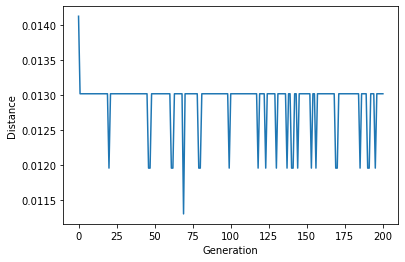

In [13]:
import matplotlib.pyplot as plt


pop = SBoxes
progress = []
progress.append(rankPop(pop)[0][1])
print(rankPop(pop)[0])
generations = 200
eliteSize = 20
mutationRate = 0.02
    
for i in range(0, generations):
    print('generation')
    print(i)
    pop = nextGeneration(pop, eliteSize, mutationRate)
    progress.append(rankPop(pop)[0][1])
    
plt.plot(progress)
plt.ylabel('Distance')
plt.xlabel('Generation')
plt.show()

In [14]:
du_maxes = []
non_lin = []
combined = []
for i in range(50, len(pop)):
    SB = SBox(pop[i])
    d = SB.differential_uniformity()
    n = SB.nonlinearity()
    du_maxes = np.append(du_maxes, d)
    non_lin = np.append(non_lin, n)
    if n == 0:
        combined = np.append(combined, d)
    else:
        combined = np.append(combined, (d / n))
        
print(np.average(combined))

0.12353906685120247


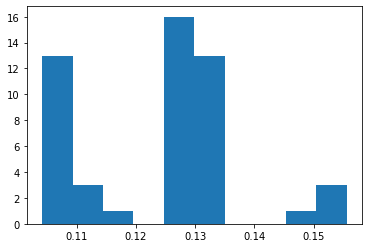

In [15]:
import matplotlib.pyplot as plt
plt.hist(combined);
plt.show()